In [2]:
'''
Date: 2022.05.23
Title: 
By: Kang Jin Seong
'''
''' 손실 곡선 '''
# 패션 MNIST 데이터셋 적재
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# 모델 만들기
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100,activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# fit() 메서드의 결과를 history 변수에 담기

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)  #verbose : 훈련 과정 출력을 조절
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


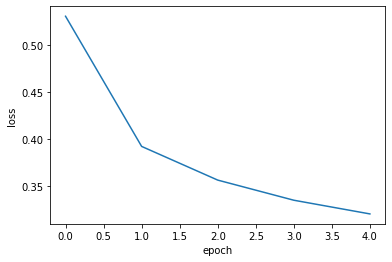

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.show()

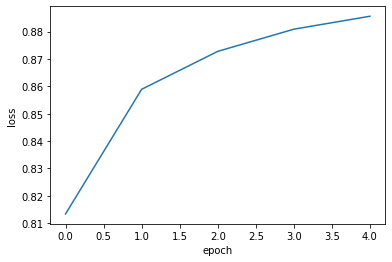

In [6]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.show()

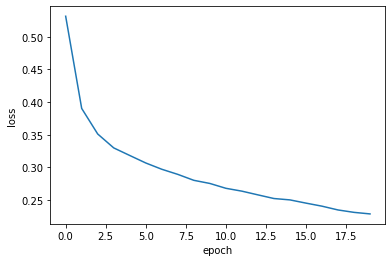

In [7]:
# 에포크를 늘려서 모델 훈련하고 손실 그래프 그려보기
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)  #verbose : 훈련 과정 출력을 조절
plt.plot(history.history['loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.show()

In [8]:
''' 검증 손실 '''
#에포크 마다 검증 손실 계산
# 다음처럼 validation_data 매개 변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target)) #verbose : 훈련 과정 출력을 조절
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


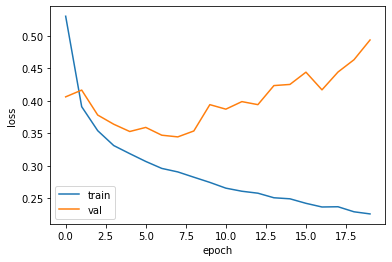

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.legend(['train', 'val']);plt.show()

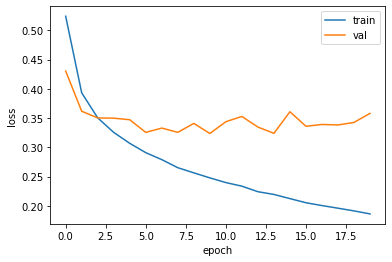

In [10]:
model = model_fn()
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target)) #verbose : 훈련 과정 출력을 조절
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.legend(['train', 'val']);plt.show()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


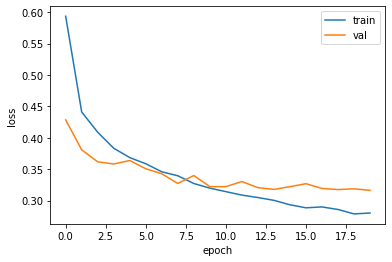

In [11]:
'''드롭 아웃'''
# 과대적합을 막기 위한 규제방식
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target)) #verbose : 훈련 과정 출력을 조절
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.legend(['train', 'val']);plt.show()

In [12]:
'''모델 저장과 복원 '''
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0,
                    validation_data = (val_scaled, val_target)) #verbose : 훈련 과정 출력을 조절

model.save_weights('model-weights.h5')
model.save('model-whole.h5')
!ls -al *.h5

-rw-r--r-- 1 root root 333448 May 25 08:33 model-weights.h5
-rw-r--r-- 1 root root 982664 May 25 08:33 model-whole.h5


In [13]:
# 첫 번째 훈련을 하지 않는 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [14]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8804166666666666


In [15]:
# 두 번째 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8804


[0.3390343189239502, 0.8804166913032532]

In [16]:
 ''' 콜백 '''
 # 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점 확인
 # 모델을 과대적합 되지 않는 에포크만큼 다시 훈련
 # 모델을 두 번씩 훈련하지 않고 한 번에 끝내 는 방법: 콜백

 model = model_fn(keras.layers.Dropout(0.3))
 model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
 checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
 model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
           validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])

8


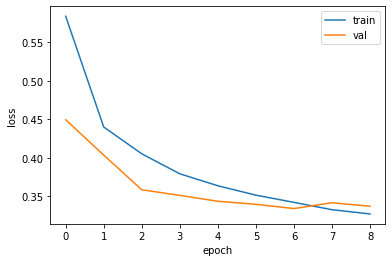

375/375 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8786


[0.3343443274497986, 0.8785833120346069]

In [18]:
''' 조기 종료 '''
# ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장
# 과대적합이 시작되기 전에 훈련을 미리 중지하는 조기종료

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
# patience: 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정
# restore_best_weights: 가장 낮은 검증 손신을 낸 모델 파라미터로 되돌린다.
history =  model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
           validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])
 
print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.legend(['train', 'val']);plt.show()

model.evaluate(val_scaled, val_target)
